In [3]:
import Pkg
Pkg.activate(".")

  Activating project at `~/Documents/programming/BME-574-2024`


In [32]:
Pkg.add(["CairoMakie","LinearAlgebra","Distributions","Convex","SCS","StatsBase"])

   Resolving package versions...
    Updating `~/Documents/programming/BME-574-2024/Project.toml`
⌅ [2913bbd2] + StatsBase v0.33.21
  No Changes to `~/Documents/programming/BME-574-2024/Manifest.toml`


In [33]:
using CairoMakie, LinearAlgebra, Statistics, Distributions, Convex, SCS, StatsBase

In [6]:
x = LinRange(0,4,100)

100-element LinRange{Float64, Int64}:
 0.0, 0.040404, 0.0808081, 0.121212, …, 3.87879, 3.91919, 3.9596, 4.0

In [7]:
col_list = Vector{Float64}[]
for p in 0:19
    push!(col_list, x .^ p)
end
A = reduce(hcat,col_list)

100×20 Matrix{Float64}:
 1.0  0.0         0.0          0.0          …  0.0          0.0
 1.0  0.040404    0.00163249   6.5959e-5       8.23467e-26  3.32714e-27
 1.0  0.0808081   0.00652995   0.000527672     2.15867e-20  1.74438e-21
 1.0  0.121212    0.0146924    0.00178089      3.19028e-17  3.86701e-18
 1.0  0.161616    0.0261198    0.00422138      5.65882e-15  9.14557e-16
 1.0  0.20202     0.0408122    0.00824488   …  3.14128e-13  6.34602e-14
 1.0  0.242424    0.0587695    0.0142472       8.36313e-12  2.02743e-12
 1.0  0.282828    0.0799918    0.022624        1.34095e-10  3.79257e-11
 1.0  0.323232    0.104479     0.033771        1.48343e-9   4.79491e-10
 1.0  0.363636    0.132231     0.0480841       1.23598e-8   4.49447e-9
 1.0  0.40404     0.163249     0.065959     …  8.23467e-8   3.32714e-8
 1.0  0.444444    0.197531     0.0877915       4.57841e-7   2.03485e-7
 1.0  0.484848    0.235078     0.113977        2.19234e-6   1.06295e-6
 ⋮                                          ⋱       

In [8]:
# alternative way of constructing the matrix
A2 = zeros(100,20)
for i in 1:100
    for j in 1:20
        A2[i,j] = x[i]^(j-1)
    end
end

In [9]:
y = x .^2

100-element Vector{Float64}:
  0.0
  0.0016324864809713297
  0.006529945923885319
  0.014692378328741967
  0.026119783695541274
  0.040812162024283234
  0.05876951331496787
  0.07999183756759513
  0.1044791347821651
  0.1322314049586777
  0.16324864809713294
  0.19753086419753085
  0.23507805325987147
  ⋮
 12.641975308641975
 12.9309254157739
 13.223140495867767
 13.51862054892358
 13.817365574941332
 14.11937557392103
 14.424650545862667
 14.733190490766248
 15.044995408631774
 15.360065299459238
 15.67840016324865
 16.0

In [10]:
Ainv = pinv(A)

20×100 Matrix{Float64}:
   0.622003      0.371746      0.186872    …  -0.0319433     0.0143198
  -7.08164      -2.76454       0.186791        0.97729      -0.441725
  22.9107        6.4267       -4.29969        -5.42482       2.47064
 -23.3642       -4.48681       7.24651         9.00329      -4.14144
  -5.77454      -2.17978       0.366121       -0.640233      0.336483
  14.5041        2.2088       -5.25456     …  -7.14478       3.30396
   9.11436       2.16098      -2.29232        -1.8781        0.824821
  -8.02306      -0.794741      3.44856         5.78787      -2.71146
 -11.048        -1.98949       3.59403         4.43746      -2.02942
   3.76938       0.12524      -1.92978        -4.14977       1.97488
  11.0235        1.75598      -3.87369     …  -5.57858       2.58268
  -4.29751      -0.307794      1.98396         4.32184      -2.06418
  -9.46554      -1.527         3.29866         4.80678      -2.22624
  12.0538        1.62074      -4.60389        -8.28593       3.91361
  -6.

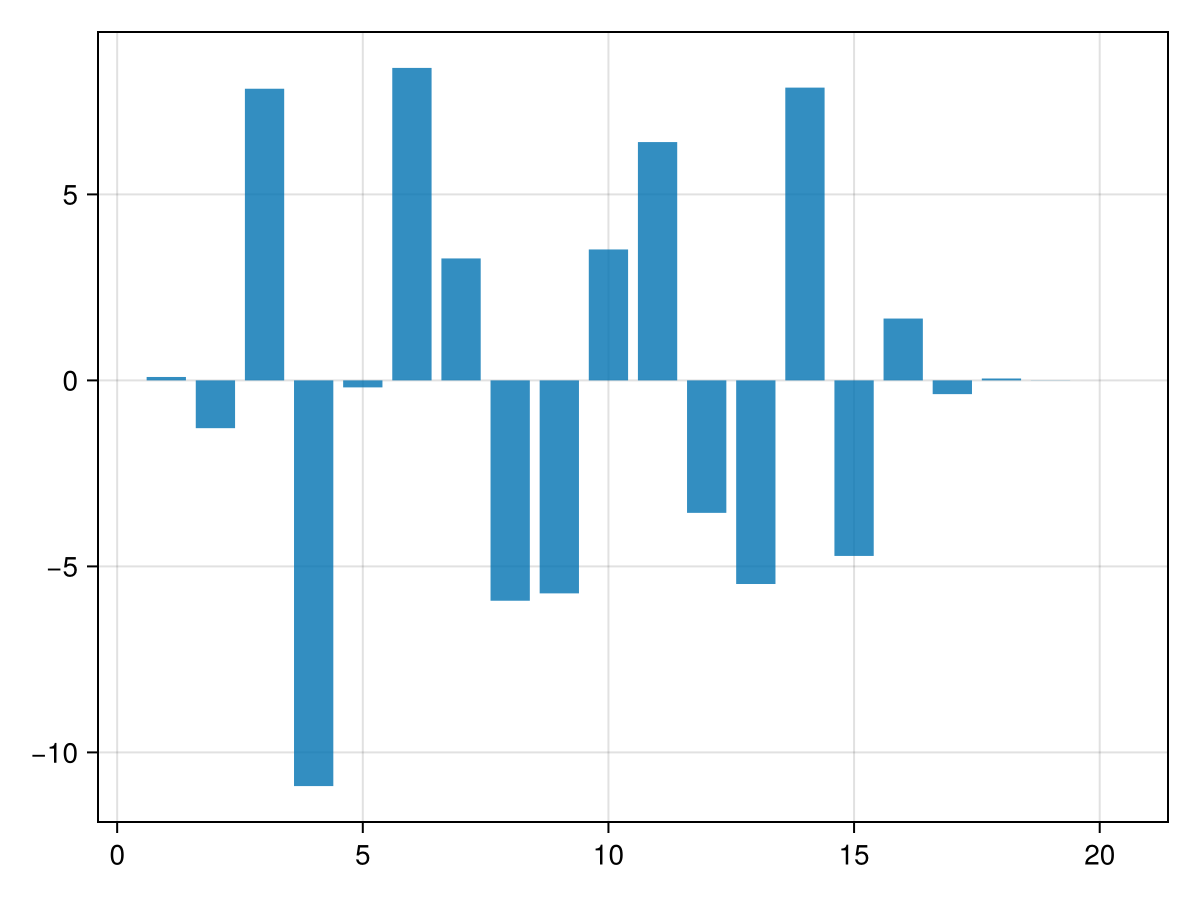

In [11]:
y1 = y .+ rand(Normal(0,0.1),length(y))
b1 = Ainv * y1
barplot(b1)

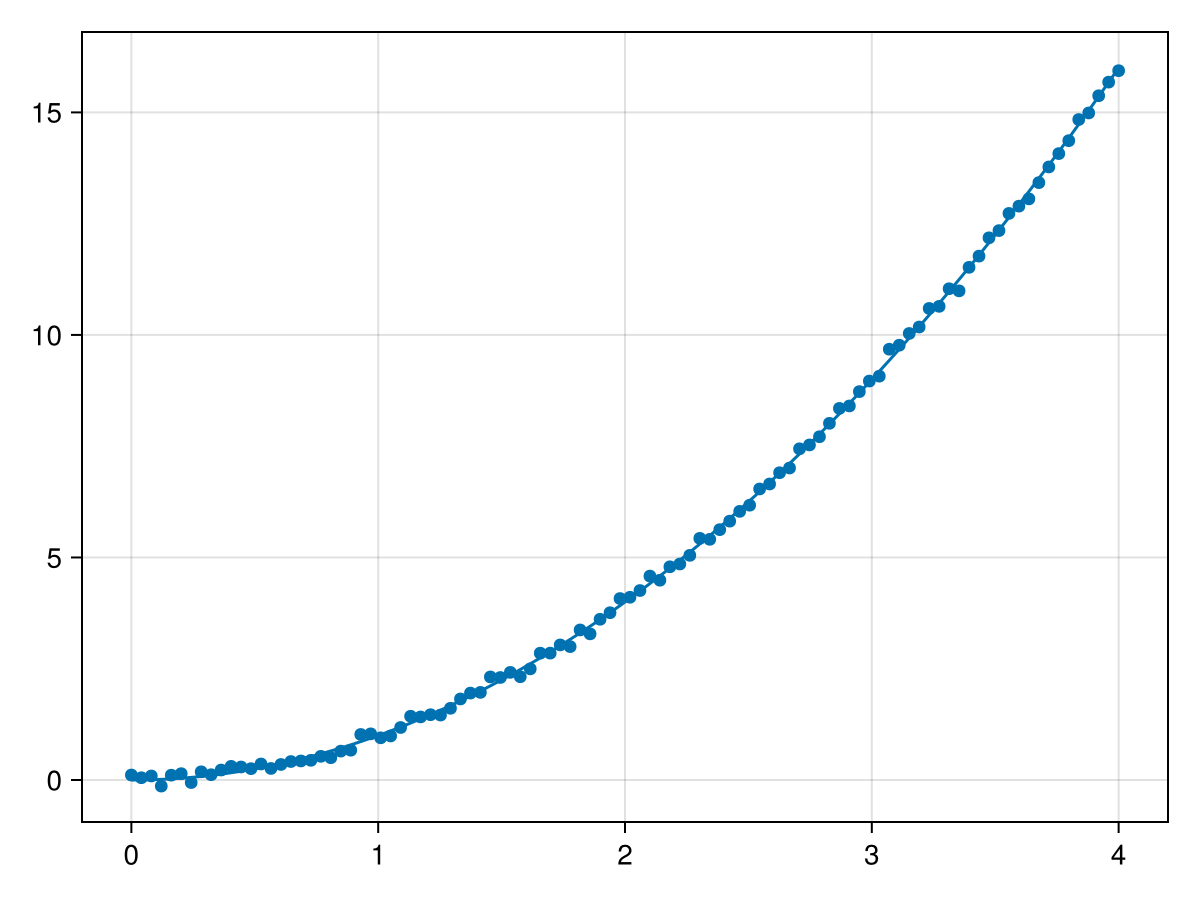

In [12]:
fig = Figure()
ax = Axis(fig[1,1])
lines!(ax,x,y)
plot!(ax,x,y1)
fig

In [13]:
# function to fit least square fit using the pseudo-inverse of the design matrix
function fitlq(A,y)
    Ainv = pinv(A)
    return Ainv * y
end

# function to fit Lasso regression
function lasso(A,y,λ1,λ2)
    x = Variable(size(A)[2])
    problem = minimize(norm(A*x-y,2) + λ1*norm(x,1) + λ2*norm(x,2))
    solve!(problem, SCS.Optimizer; silent=true)
    return vec(evaluate(x))
end

lasso (generic function with 1 method)

In [14]:
b10ls = lasso(A[:,1:10],y1,0.1,0)
b10lq = fitlq(A[:,1:10],y1)

10-element Vector{Float64}:
   0.07469163901244955
  -0.7071731284188563
   5.3682252642691335
 -12.055240367425434
  16.474418351021843
 -12.405027749228465
   5.407526485789704
  -1.35955459603111
   0.18294430417881957
  -0.010200721638651229

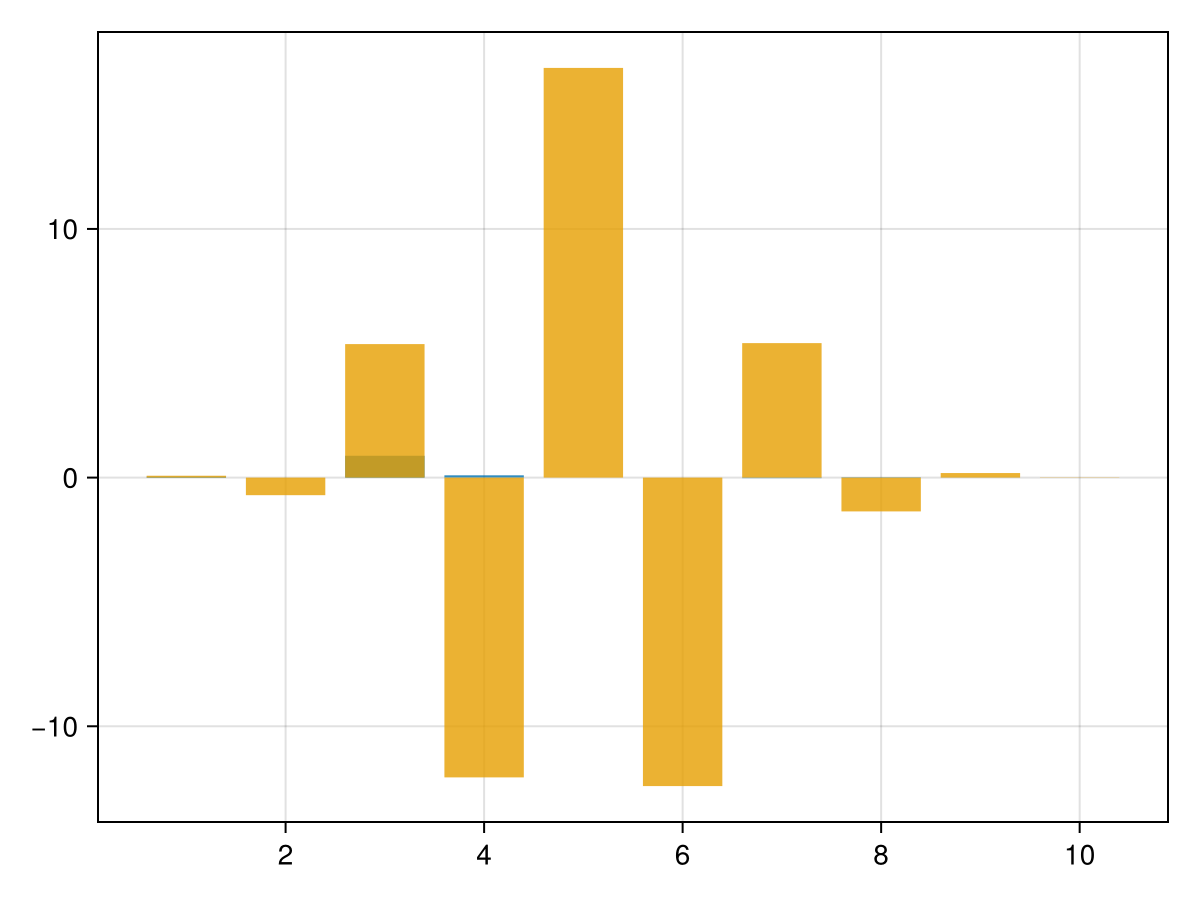

In [15]:
barplot(b10ls)
barplot!(b10lq)
current_figure()

In [17]:
xx = LinRange(0,8,200)
yy = xx .^2
yye = yy + rand(Normal(0,0.1),length(yy))

200-element Vector{Float64}:
 -0.171643696556483
 -0.1103910442075062
  0.163526617838446
  0.12704274504281862
  0.09178259484263661
 -0.055979506323103265
  0.12334036988314312
  0.14023192621504496
  0.10443128387276761
  0.06430615941372943
  0.16216992982127545
  0.1416489969201929
  0.26718372172792504
  ⋮
 57.208602452687124
 57.916841120500145
 58.45512250580141
 58.98438369699296
 59.57346603382908
 60.24508754323652
 60.841787590657326
 61.4389642249888
 62.123638556900175
 62.88657166476118
 63.31484889098157
 64.09907663291673

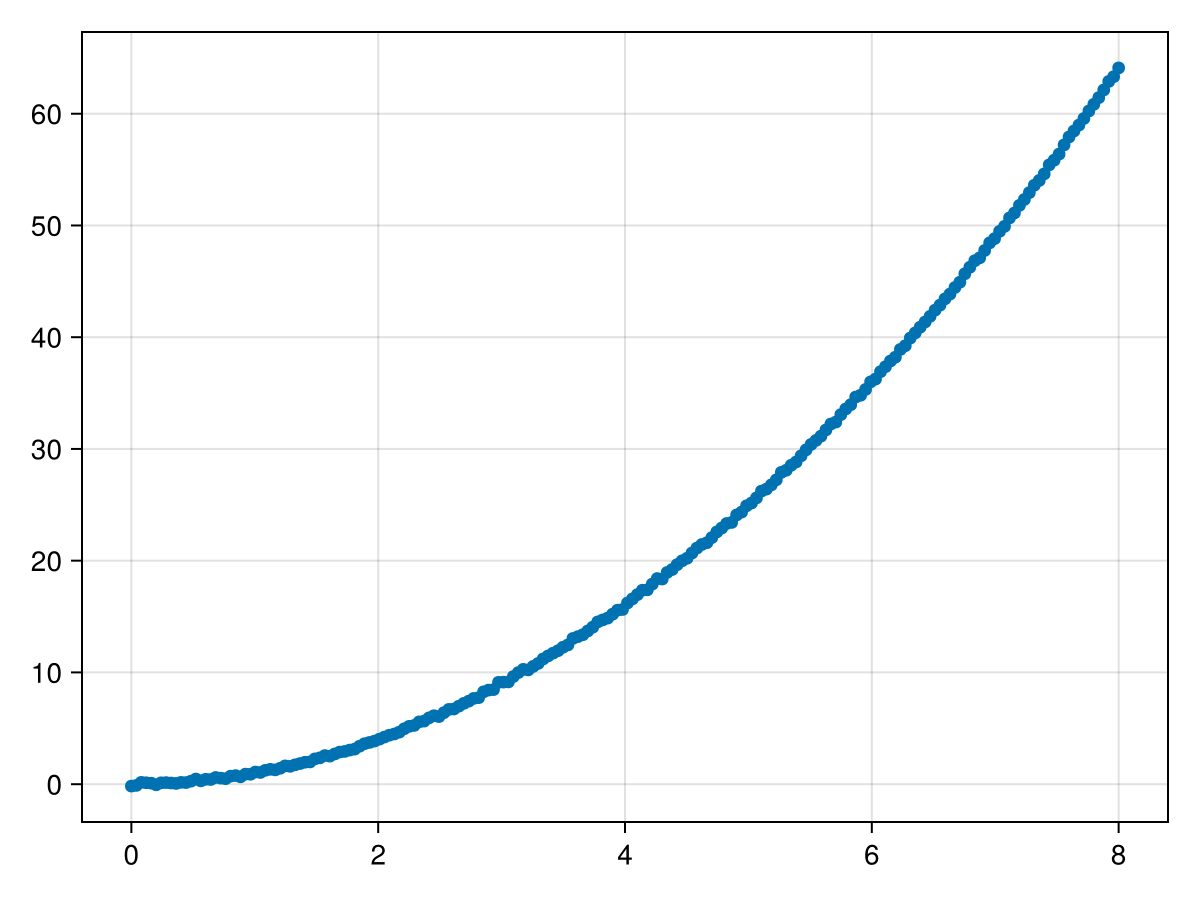

In [18]:
scatter(xx,yye)

In [19]:
# alternative way of constructing the matrix
AA = zeros(200,20)
for i in 1:200
    for j in 1:20
        AA[i,j] = xx[i]^(j-1)
    end
end

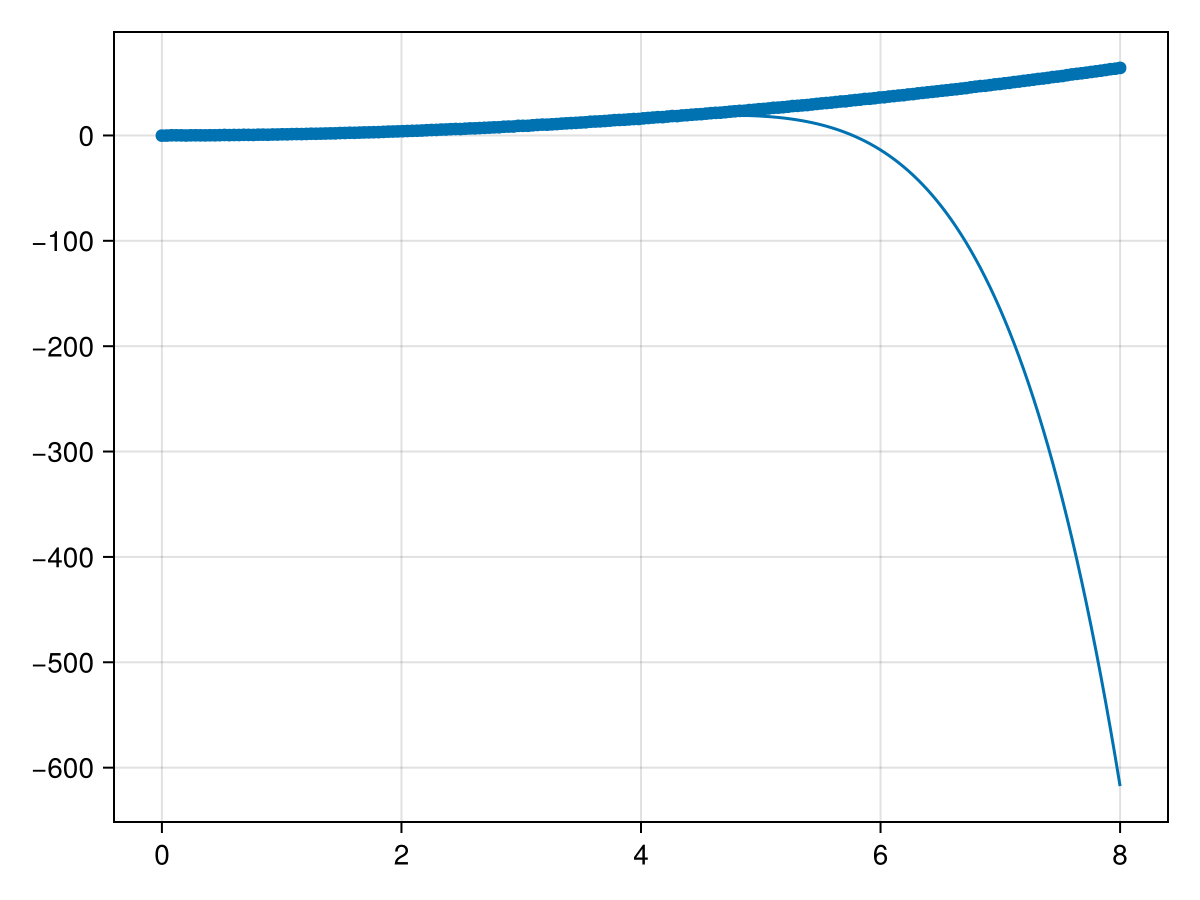

In [26]:
dp = 7
blq = fitlq(A2[:,1:dp],yye[1:100])
y_ex = AA[:,1:dp]*blq
scatter(xx,yye)
lines!(xx,y_ex)
current_figure()

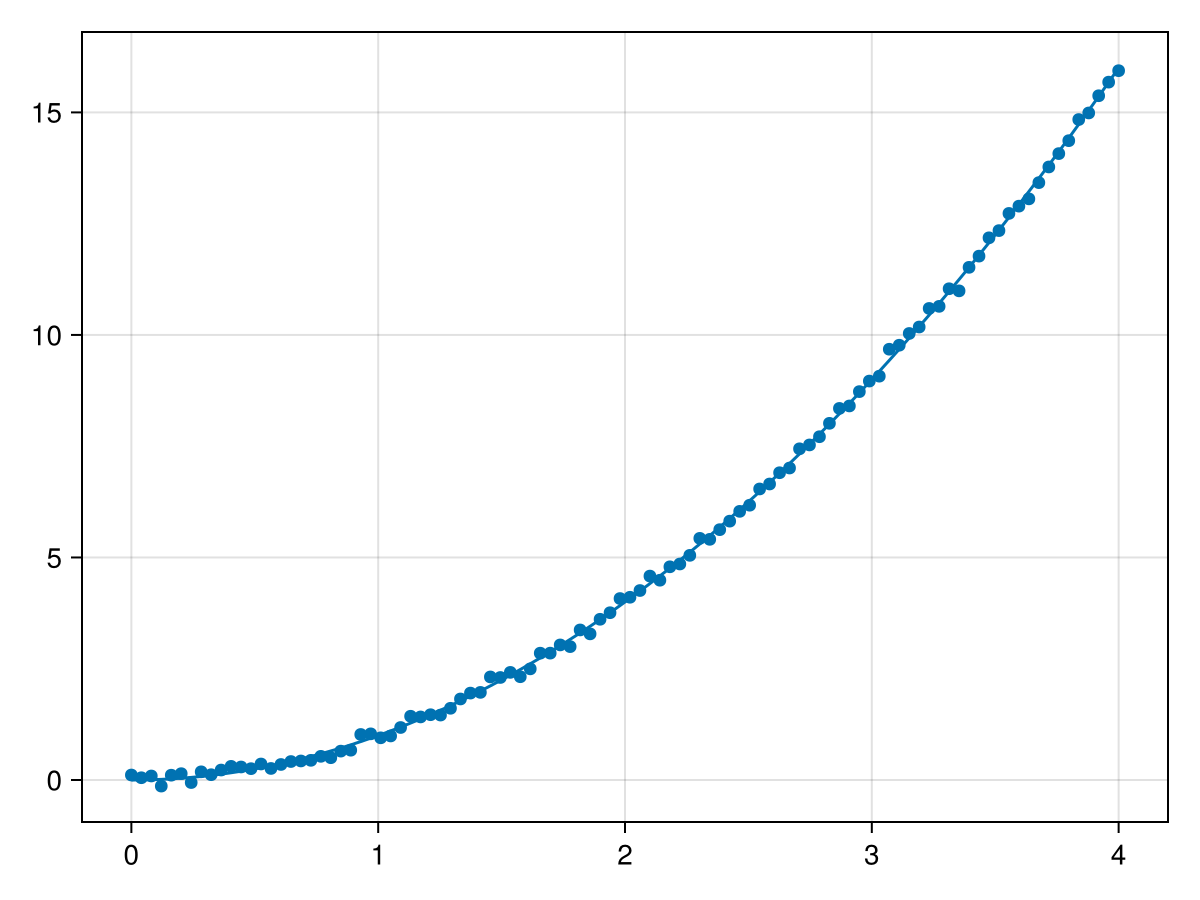

In [27]:
# k-fold strategy
scatter(x,y1)
lines!(x,y)
current_figure()

In [64]:
dp = 5
blq_list = []
for s in 1:100
    xy_sample = sample(collect(zip(x,y1)), 80, replace=false)
    A_sample = zeros(80,20)
    for i in 1:80
        for j in 1:20
            A_sample[i,j] = xy_sample[i][1]^(j-1)
        end
    end
    y_sample = [xy[2] for xy in xy_sample]
    blq = fitlq(A_sample[:,1:dp],y_sample)
    push!(blq_list, blq)
end

In [65]:
blq_m = reduce(hcat, blq_list)

5×100 Matrix{Float64}:
  0.104441     0.0515549     0.0329475   …   0.0527633    0.0329769
 -0.241013    -0.129305     -0.0468228      -0.132568    -0.0686559
  1.15006      1.06815       1.00316         1.10026      1.04316
 -0.0297576   -0.00739339    0.011593       -0.0282892   -0.00981319
  0.00107528  -0.000688959  -0.00259982      0.00263505   0.000602763

In [66]:
blq_mean = mean(blq_m, dims=2)

5×1 Matrix{Float64}:
  0.059090941170236805
 -0.121360619255942
  1.0637807420691627
 -0.009107868863651522
 -0.0001961537411545705

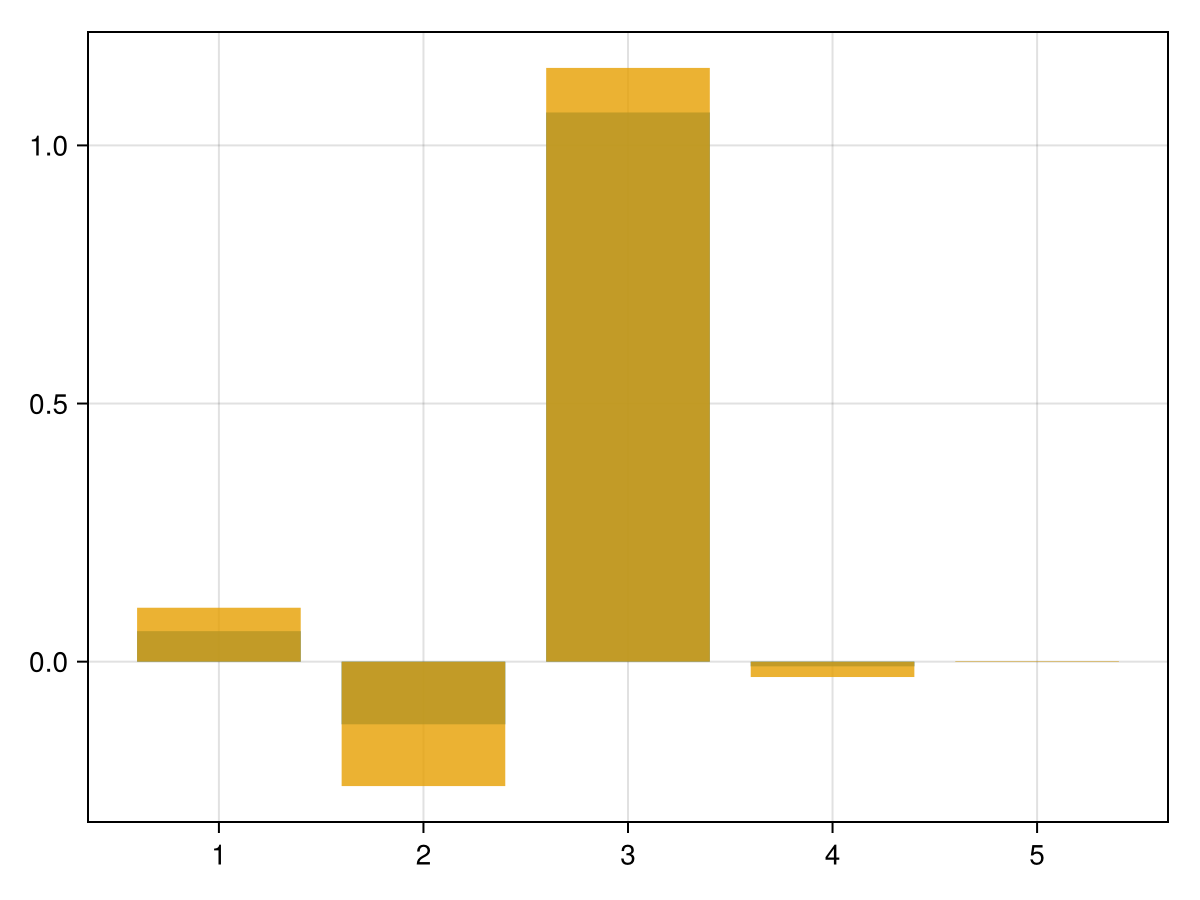

In [67]:
barplot(vec(blq_mean),label="mean")
barplot!(blq_m[:,1])
current_figure()